# Principal Component Analysis
for feature extraction using dimension reduction
scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.get_covariance

In [1]:
import pandas as pd
import numpy as np

In [2]:
ls

dengue_features_test.csv   dengue_labels_train.csv
dengue_features_train.csv  PCA_Analysis.ipynb


In [60]:
train_features = pd.read_csv('dengue_features_train.csv', index_col=['city'])
train_labels = pd.read_csv('dengue_labels_train.csv', index_col=['city'])

In [61]:
sj_train_features = train_features.loc['sj'].reset_index(drop=True)

sj_train_features.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [62]:
sj_train_labels = train_labels.loc['sj'].reset_index(drop=True)['total_cases']

sj_train_labels.head()

0    4
1    5
2    4
3    3
4    6
Name: total_cases, dtype: int64

In [63]:
import datetime, time
# >>> t = datetime.datetime(2011, 10, 21, 0, 0)
# >>> time.mktime(t.timetuple())
# 1319148000.0

def preprocess(features, labels):
#   convert timestamp to long
    features['week_start_date'] = pd.to_datetime(features['week_start_date'])
    features['week_start_date'] = features['week_start_date'].apply(lambda x : (time.mktime((datetime.datetime(x.to_datetime().year, x.to_datetime().month, x.to_datetime().day, 0, 0)).timetuple()))/1000)
    
    features.fillna(method='ffill', inplace=True)
    labels.fillna(method='ffill', inplace=True)
    
    return features, labels

sj_train_X, sj_train_y = preprocess(sj_train_features, sj_train_labels)

sj_train_X.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,1990,18,641413.8,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1990,19,642018.6,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,1990,20,642623.4,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,1990,21,643228.2,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,1990,22,643833.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(sj_train_X, sj_train_y)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

[26917659932.199036, 4763.413449680786, 864.3474051136294, 469.947403671953, 209.67485571365904, 12.156941293226996, 4.134552518777492, 1.1679038250400933, 0.5485103270005567, 0.28345207752168755]


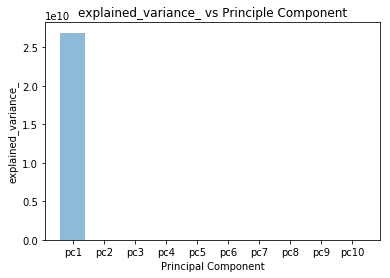

In [87]:
import matplotlib.pyplot as plt

data = list(pca.explained_variance_)

print data

plt.bar(range(len(data)), data, align='center', alpha=0.5)
plt.xticks(range(len(data)), ['pc'+str(i + 1) for i in range(len(data))])
plt.ylabel('explained_variance_')
plt.xlabel('Principal Component')
plt.title('explained_variance_ vs Principle Component')

plt.show()

In [79]:
new_sj_train_X = pca.transform(sj_train_X)

print 'Dimension before PCA : ' + str(sj_train_X.shape)
print 'Dimension after PCA : ' + str(new_sj_train_X.shape)

Dimension before PCA : (936, 23)
Dimension after PCA : (936, 10)
